In [1]:
import tensorflow as tf
import numpy as np

e:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Generate dataset

In [2]:
X_data = np.arange(1, 100, .1)

In [4]:
y_data = np.sin(X_data/10)

In [11]:
print(X_data.shape)
print(y_data.shape)
print(type(X_data))
print(type(y_data))

(990,)
(990,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

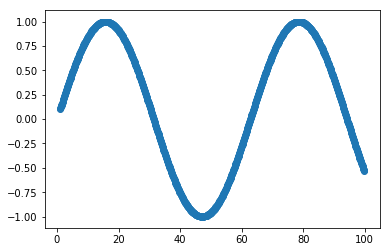

In [7]:
plt.scatter(X_data,y_data)

In [12]:
batch_size = 200
X_data = np.reshape(X_data, (X_data.shape[0],1))
y_data = np.reshape(y_data, (y_data.shape[0],1))

In [13]:
print(X_data.shape)
print(y_data.shape)
print(type(X_data))
print(type(y_data))

(990, 1)
(990, 1)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


# Construct Network

In [16]:
X = tf.placeholder(tf.float32, shape=(batch_size, 1))
y = tf.placeholder(tf.float32, shape=(batch_size, 1))

with tf.variable_scope("linear_regression",  reuse=True):
    W= tf.get_variable("weights", (1, 1), initializer=tf.random_normal_initializer())
    b= tf.get_variable("bias", (1,), initializer=tf.constant_initializer(0.0))
    
    y_pred = tf.matmul(X, W) + b
    
    loss = tf.reduce_sum(tf.pow((y - y_pred), 2) / y_data.shape[0])


In [17]:
opt = tf.train.AdamOptimizer()
opt_operation = opt.minimize(loss)

In [ ]:
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    loss = []
    for i in range(500):
        indices = np.random.choice(y_data.shape[0], batch_size)
        X_batch, y_batch = X_data[indices], y_data[indices]
        
        opt, loss_value = sess.run([opt_operation, loss], feed_dict={X:X_batch, y:y_batch})
        
        loss.append(loss_value)